+ https://github.com/JuliaAcademy/DataScience/blob/master/07.%20Regression.ipynb

In [37]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

Pkg.add("DataStructures")
Pkg.resolve()

mkpath("downloads")
mkpath("out")

 Activating environment at `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\appunti\Project.toml`
  Resolving package versions...
Updating `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\appunti\Project.toml`
  [864edb3b] + DataStructures v0.17.20
No Changes to `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\appunti\Manifest.toml`
No Changes to `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\appunti\Project.toml`
No Changes to `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\appunti\Manifest.toml`


"out"

In [74]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
using Plots
using Statistics
using StatsBase
using PyCall
using DataFrames
using GLM
using Tables
using XLSX
using MLBase
using RDatasets
using LsqFit
using DataStructures
using Makie

┌ Info: Precompiling Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a]
└ @ Base loading.jl:1278


In [9]:
?std


search: std stdm stdin stdout stderr stderror setdiff setdiff! stride strides



```
std(itr; corrected::Bool=true, mean=nothing[, dims])
```

Compute the sample standard deviation of collection `itr`.

The algorithm returns an estimator of the generative distribution's standard deviation under the assumption that each entry of `itr` is an IID drawn from that generative distribution. For arrays, this computation is equivalent to calculating `sqrt(sum((itr .- mean(itr)).^2) / (length(itr) - 1))`. If `corrected` is `true`, then the sum is scaled with `n-1`, whereas the sum is scaled with `n` if `corrected` is `false` with `n` the number of elements in `itr`.

If `itr` is an `AbstractArray`, `dims` can be provided to compute the standard deviation over dimensions, and `means` may contain means for each dimension of `itr`.

A pre-computed `mean` may be provided. When `dims` is specified, `mean` must be an array with the same shape as `mean(itr, dims=dims)` (additional trailing singleton dimensions are allowed).

!!! note
    If array contains `NaN` or [`missing`](@ref) values, the result is also `NaN` or `missing` (`missing` takes precedence if array contains both). Use the [`skipmissing`](@ref) function to omit `missing` entries and compute the standard deviation of non-missing values.


---

```
std(x::AbstractArray, w::AbstractWeights, [dim]; mean=nothing, corrected=false)
```

Compute the standard deviation of a real-valued array `x`, optionally over a dimension `dim`. Observations in `x` are weighted using weight vector `w`. The uncorrected (when `corrected=false`) sample standard deviation is defined as:

$$
\sqrt{\frac{1}{\sum{w}} \sum_{i=1}^n {w_i\left({x_i - μ}\right)^2 }}
$$

where $n$ is the length of the input and $μ$ is the mean. The unbiased estimate (when `corrected=true`) of the population standard deviation is computed by replacing $\frac{1}{\sum{w}}$ with a factor dependent on the type of weights used:

  * `AnalyticWeights`: $\frac{1}{\sum w - \sum {w^2} / \sum w}$
  * `FrequencyWeights`: $\frac{1}{\sum{w} - 1}$
  * `ProbabilityWeights`: $\frac{n}{(n - 1) \sum w}$ where $n$ equals `count(!iszero, w)`
  * `Weights`: `ArgumentError` (bias correction not supported)

---

```
std(d::UnivariateDistribution)
```

Return the standard deviation of distribution `d`, i.e. `sqrt(var(d))`.


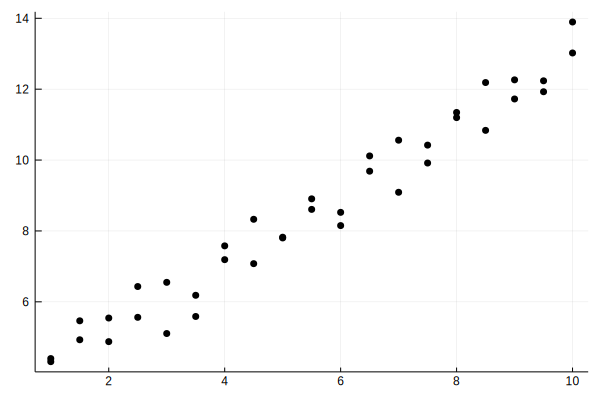

In [10]:
# 3 modi per fare lo stesso lm
## esempio di mod lineare
xvals = repeat(1:0.5:10, inner=2)
yvals = 3 .+ xvals .+ 2 .* rand(length(xvals)) .-1
scatter(xvals, yvals, color=:black, leg=false)
#polotto dati

In [11]:
function find_best_fit(xvals,yvals)
    meanx = mean(xvals)
    meany = mean(yvals)
    stdx = std(xvals)
    stdy = std(yvals)
    r = cor(xvals,yvals)
    b1_hat = r*stdy/stdx
    b0_hat = meany - b1_hat*meanx
    return b1_hat,b0_hat
end
# fun che trova modello lineare semplice

find_best_fit (generic function with 1 method)

In [12]:
b1_hat,b0_hat = find_best_fit(xvals,yvals) #
ynew = b1_hat .* xvals .+ b0_hat# creiamo array di valori predetti

38-element Array{Float64,1}:
  4.2328704143661815
  4.2328704143661815
  4.7138850796885885
  4.7138850796885885
  5.194899745010995
  5.194899745010995
  5.675914410333402
  5.675914410333402
  6.156929075655809
  6.156929075655809
  6.637943740978216
  6.637943740978216
  7.118958406300622
  ⋮
 10.486061063557468
 10.486061063557468
 10.967075728879875
 10.967075728879875
 11.448090394202282
 11.448090394202282
 11.929105059524689
 11.929105059524689
 12.410119724847094
 12.410119724847094
 12.891134390169501
 12.891134390169501

In [19]:
resid = ynew-yvals

38-element Array{Float64,1}:
 -0.07835811695535977
 -0.16612264629100348
 -0.21541181190544467
 -0.7503000325450646
 -0.347941959821334
  0.3181846616070283
  0.11332608983076131
 -0.7557977653206205
  1.0513230073480528
 -0.3927168105907253
  1.0513606415017422
  0.45371103963401715
 -0.45997861980210697
  ⋮
  0.06469197963668094
  0.5697448262034754
 -0.23029699279426374
 -0.37616155244537275
  0.6102901771068243
 -0.7391462265084012
 -0.33402996248617356
  0.20570995279310544
  0.17415584534217565
  0.48248288142284146
 -0.13008454414583426
 -1.004176993551507

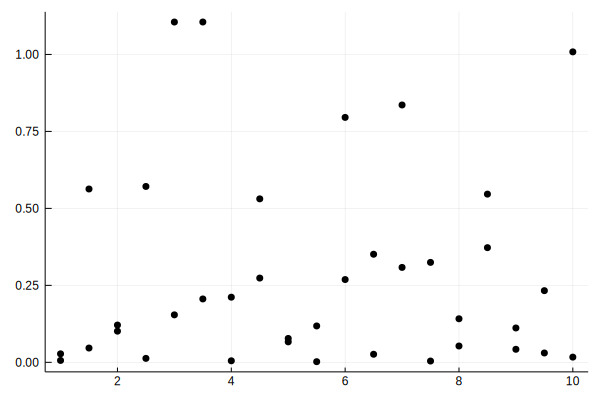

In [26]:
scatter(xvals, resid.^2, color=:black, leg=false)# no pattern visible

MSE = mean(resid .^ 2) = 0.2835762611230556


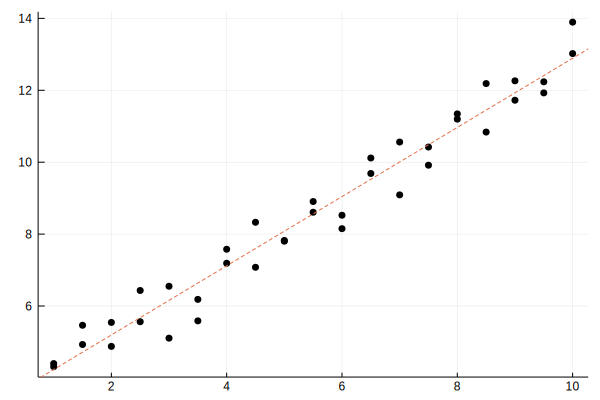

In [46]:
scatter(xvals, yvals, color=:black, leg=false)
@show MSE = mean(resid.^2)
Plots.abline!(b1_hat, b0_hat, line=:dash)
# linear model fits data well

In [16]:
np = pyimport("numpy");

  0.750127 seconds (1.05 M allocations: 54.581 MiB, 2.41% gc time)


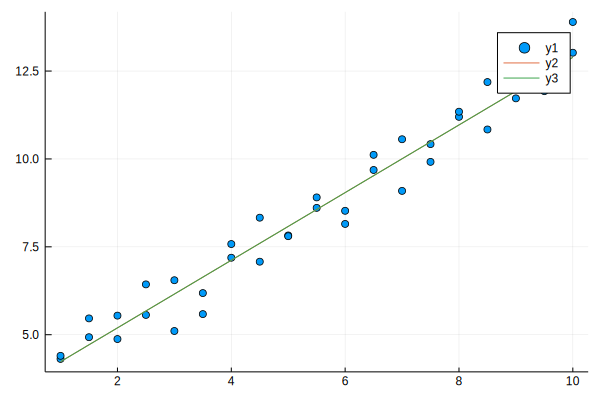

In [17]:

xdata = xvals
ydata = yvals
@time myfit = np.polyfit(xdata, ydata, 1);
ynew2 = collect(xdata) .* myfit[1] .+ myfit[2];
scatter(xvals,yvals)
plot!(xvals,ynew)
plot!(xvals,ynew2)

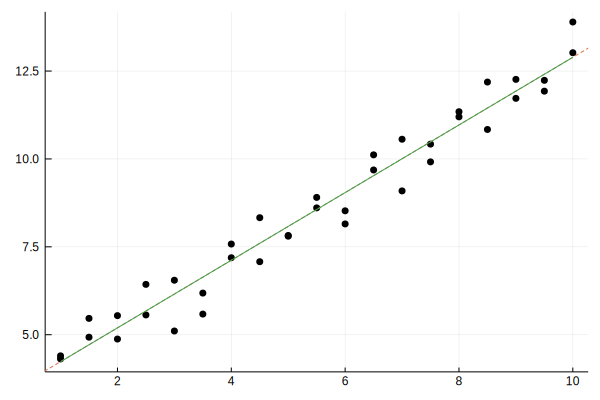

In [34]:
data = DataFrame(X=xdata, Y=ydata)
ols = lm(@formula(Y ~ X), data)
plot!(xdata,predict(ols))

In [33]:
## ora con dati un pò più complessi...
file = download("https://github.com/JuliaAcademy/DataScience/blob/master/data/zillow_data_download_april2020.xlsx?raw=true",
    "downloads/zillow_data_download_april2020.xlsx")

"downloads/zillow_data_download_april2020.xlsx"

In [35]:
R = XLSX.readxlsx("downloads/zillow_data_download_april2020.xlsx")
sale_counts = R["Sale_counts_city"][:]
df_sale_counts = DataFrame(sale_counts[2:end,:],Symbol.(sale_counts[1,:]))

monthly_listings = R["MonthlyListings_City"][:]
df_monthly_listings = DataFrame(monthly_listings[2:end,:],Symbol.(monthly_listings[1,:]))

monthly_listings_2020_02 = df_monthly_listings[!,[1,2,3,4,5,end]]
rename!(monthly_listings_2020_02, Symbol("2020-02") .=> Symbol("listings"))

sale_counts_2020_02 = df_sale_counts[!,[1,end]]
rename!(sale_counts_2020_02, Symbol("2020-02") .=> Symbol("sales"))

,RegionID,sales
,Any,Any
1,6181,4054
2,12447,1522
3,39051,2682
4,17426,2100
5,6915,1626
6,13271,1620
7,40326,2325
8,18959,2547
9,54296,missing


C.map = Dict{Any,Int64}("DC" => 1,"NH" => 86,"UT" => 41,"WV" => 35,"NY" => 195,"MN" => 121,"GA" => 73,"TX" => 262,"LA" => 60,"MS" => 42,"IA" => 52,"IL" => 324,"NM" => 27,"OK" => 70,"RI" => 33,"NJ" => 291,"KS" => 42,"ID" => 31,"OH" => 232,"HI" => 34,"MA" => 148,"VT" => 21,"MT" => 23,"MI" => 286,"MO" => 134,"FL" => 336,"NV" => 23,"CA" => 340,"SC" => 102,"WY" => 9,"KY" => 69,"ME" => 97,"NC" => 223,"AR" => 64,"AZ" => 70,"ND" => 1,"SD" => 7,"DE" => 20,"NE" => 15,"MD" => 164,"AL" => 110,"AK" => 14,"CO" => 118,"WI" => 190,"TN" => 155,"WA" => 112,"CT" => 113,"VA" => 137,"PA" => 251,"OR" => 104)
(si, coef(ols)) = ("CA", [0.29595375979515304])
(si, coef(ols)) = ("FL", [0.16693529057344902])
(si, coef(ols)) = ("IL", [0.22291703276169347])
(si, coef(ols)) = ("NJ", [0.25556391864492345])
(si, coef(ols)) = ("MI", [0.2925436820147375])
(si, coef(ols)) = ("TX", [0.24732835944836878])
(si, coef(ols)) = ("PA", [0.310066636803275])
(si, coef(ols)) = ("OH", [0.4569949754409864])
(si, coef(ols)) = ("NC", [

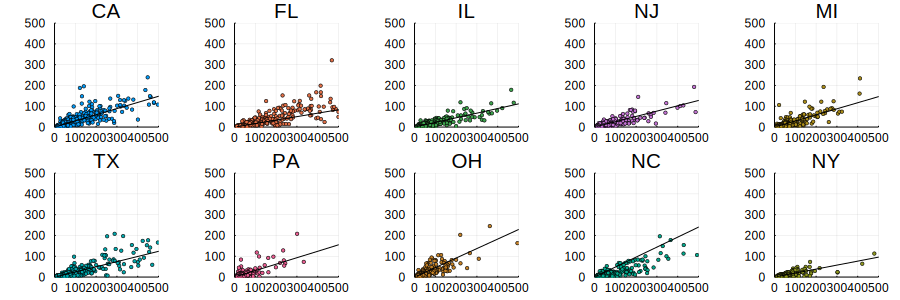

In [44]:
Feb2020data = innerjoin(monthly_listings_2020_02,sale_counts_2020_02,on=:RegionID) #, type="outer")
dropmissing!(Feb2020data)
sales = Feb2020data[!,:sales]
# prices = Feb2020data[!,:price]
counts = Feb2020data[!,:listings]
states = Feb2020data[!,:StateName]
C = counter(states)
@show C.map
countvals = values(C.map)
topstates = sortperm(collect(countvals),rev=true)[1:10]
states_of_interest = collect(keys(C.map))[topstates]
all_plots = Array{Plots.Plot}(undef,10)
for (i,si) in enumerate(states_of_interest)
    curids = findall(Feb2020data[!,:StateName].==si)
    data = DataFrame(X=float.(counts[curids]), Y=float.(sales[curids]))
    ols = GLM.lm(@formula(Y ~ 0 + X), data) # NB: pone intercetta a 0   
    all_plots[i] = scatter(counts[curids],sales[curids],markersize=2,
        xlim=(0,500),ylim=(0,500),color=i,aspect_ratio=:equal,
        legend=false,title=si)
    @show si,coef(ols)# parametri del modello (solo b1 poichè intercetta a 0)
    plot!(counts[curids],predict(ols),color=:black)
end
plot(all_plots...,layout=(2,5),size=(900,300))### [a,b,c]... = a,b,c


(si, coef(ols)) = ("CA", [6.803086464628306, 0.2879837428995036])
(si, coef(ols)) = ("FL", [19.126255819233393, 0.15510798334559428])
(si, coef(ols)) = ("IL", [0.6626439876883535, 0.22263257658072116])
(si, coef(ols)) = ("NJ", [-1.963591164222573, 0.2650303535602978])
(si, coef(ols)) = ("MI", [-0.918194204170358, 0.2976870503245954])
(si, coef(ols)) = ("TX", [5.241220767319315, 0.24566620049636262])
(si, coef(ols)) = ("PA", [-0.2136244857995347, 0.31019554103097263])
(si, coef(ols)) = ("OH", [-6.026958739166818, 0.47909280478486943])
(si, coef(ols)) = ("NC", [-24.60003985327955, 0.5302793903364811])
(si, coef(ols)) = ("NY", [-0.20048638474402883, 0.19153509216798098])


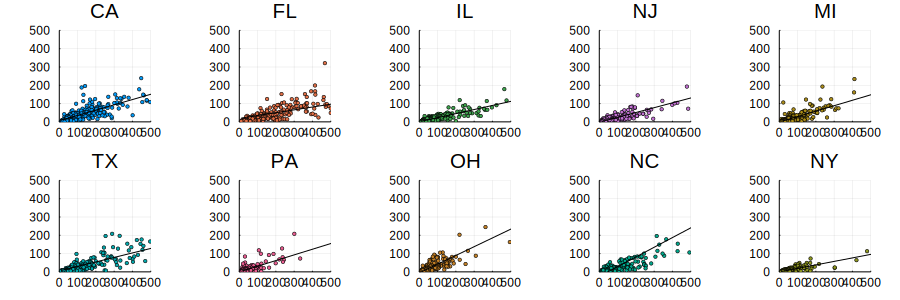

In [47]:
all_plots = Array{Plots.Plot}(undef,10)
for (i,si) in enumerate(states_of_interest)
    curids = findall(Feb2020data[!,:StateName].==si)
    data = DataFrame(X=float.(counts[curids]), Y=float.(sales[curids]))
    ols = GLM.lm(@formula(Y ~ X), data)    
    all_plots[i] = scatter(counts[curids],sales[curids],markersize=2,
        xlim=(0,500),ylim=(0,500),color=i,aspect_ratio=:equal,
        legend=false,title=si)
    @show si,coef(ols)# parametri del modello
    plot!(counts[curids],predict(ols),color=:black)
end
plot(all_plots...,layout=(2,5),size=(900,300))

(si, coef(ols)) = ("CA", [0.29595375979515304])
(si, coef(ols)) = ("FL", [0.16693529057344902])
(si, coef(ols)) = ("IL", [0.22291703276169347])
(si, coef(ols)) = ("NJ", [0.25556391864492345])
(si, coef(ols)) = ("MI", [0.2925436820147375])
(si, coef(ols)) = ("TX", [0.24732835944836878])
(si, coef(ols)) = ("PA", [0.310066636803275])
(si, coef(ols)) = ("OH", [0.4569949754409864])
(si, coef(ols)) = ("NC", [0.4800747758857476])
(si, coef(ols)) = ("NY", [0.19151984869233082])


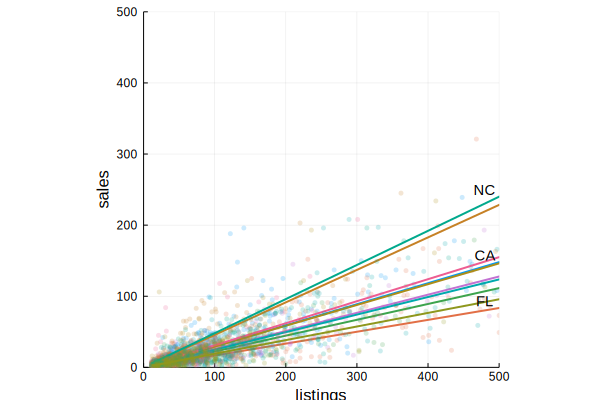

In [49]:
plot()
for (i,si) in enumerate(states_of_interest)
    curids = findall(Feb2020data[!,:StateName].==si)
    data = DataFrame(X=float.(counts[curids]), Y=float.(sales[curids]))
    ols = GLM.lm(@formula(Y ~ 0 + X), data)    
    scatter!(counts[curids],sales[curids],markersize=2,
        xlim=(0,500),ylim=(0,500),color=i,aspect_ratio=:equal,
        legend=false,marker=(3,3,stroke(0)),alpha=0.2)
        if si == "NC" || si == "CA" || si == "FL"
            annotate!([(500-20,10+coef(ols)[1]*500,text(si,10))])
        end
    @show si,coef(ols)
    plot!(counts[curids],predict(ols),color=i,linewidth=2)
end
# plot(all_plots...,layout=(2,5),size=(900,300))
xlabel!("listings")
ylabel!("sales")
#plotta tutti i dati e tutti i modelli nello stesso plot

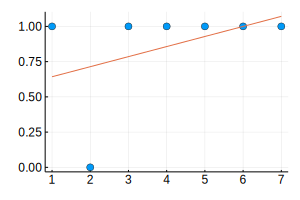

In [50]:
#logistic

data = DataFrame(X=[1,2,3,4,5,6,7], Y=[1,0,1,1,1,1,1])
linear_reg = lm(@formula(Y ~ X), data)
scatter(data[!,:X],data[!,:Y],legend=false,size=(300,200))
plot!(1:7,predict(linear_reg))
# vogliamo predirre una binomiale
# lm normale non va bene!

In [51]:
#usiamo glm
#prendiamo dati
cats = dataset("MASS", "cats")#da rdatasets

,Sex,BWt,HWt
,Cat…,Float64,Float64
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3
6,F,2.1,7.6
7,F,2.1,8.1
8,F,2.1,8.2
9,F,2.1,8.3


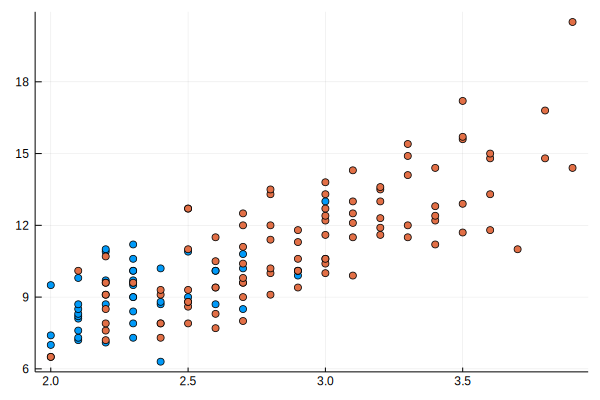

In [61]:
# plottiamo bwt/hwt rappresentando sesso come colore
lmap = labelmap(cats[!,:Sex])
ci = labelencode(lmap, cats[!,:Sex])
scatter(cats[!,:BWt],cats[!,:HWt],color=ci,legend=false)

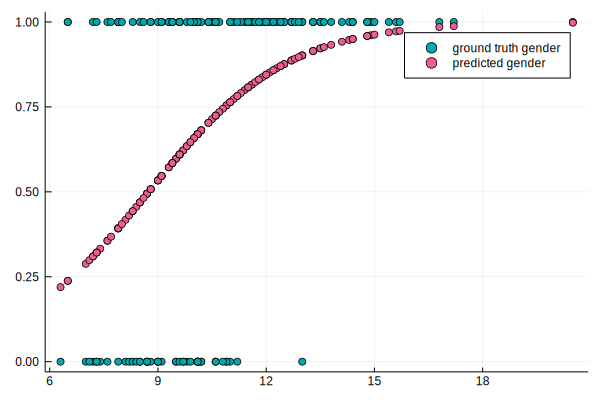

In [67]:
# gatti maschi sembran più presenti in alto a destra (alti bwt,hwt)

#vediamo un modello logistic che predica sesso in bnase a hwt
data = DataFrame(X=cats[!,:HWt], Y=ci.-1)
probit = glm(@formula(Y ~ X), data, Binomial(), LogitLink())
scatter(data[!,:X],data[!,:Y],label="ground truth gender",color=6)
scatter!(data[!,:X],predict(probit),label="predicted gender",color=7)

In [78]:
#i valori rimangono compresi tra 0 e 1


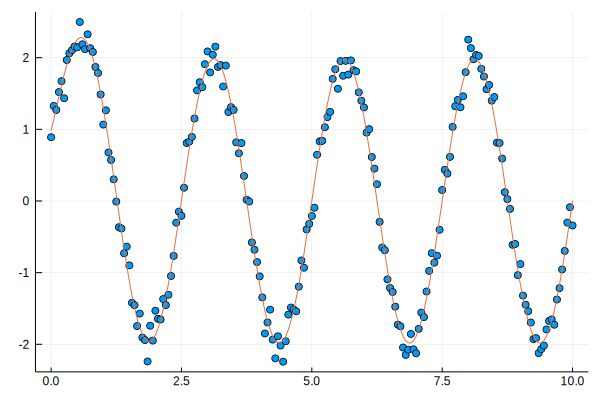

In [81]:
# regressione non lineare
# si usa model

#creiamo dataset
xvals = 0:0.05:10
yvals = 1*exp.(-xvals*2) + 2*sin.(0.8*pi*xvals) + 0.15 * randn(length(xvals));
scatter(xvals,yvals,legend=false)

#facciamo modello
@. model(x, p) = p[1]*exp(-x*p[2]) + p[3]*sin(0.8*pi*x)
p0 = [0.5, 0.5, 0.5]
myfit = curve_fit(model, xvals, yvals, p0)

#plottiamo 
p = myfit.param
findyvals = p[1]*exp.(-xvals*p[2]) + p[3]*sin.(0.8*pi*xvals)
scatter(xvals,yvals,legend=false)
plot!(xvals,findyvals)